In [1]:
from LNN import *

# matplotlib settings
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rc
plt.style.use('fivethirtyeight')
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex = True)

In [2]:
lnn = LNN(v = LNN.struct_weight_maker(10, 1), w = LNN.struct_weight_maker(10, 1))

In [3]:
ns = np.arange(500)
fish_nl = np.zeros(ns.shape)
for idx, n in enumerate(ns):
    lnn = LNN(v = np.ones(n), w = lnn.struct_weight_maker(n, n - 1))
    fish_nl[idx] = lnn.FI_squared_nonlin(2)

/Users/psachdeva/Documents/projects/noise_diversity/LNN.py:35: RuntimeWarning: divide by zero encountered in true_divide
  repeats = np.ceil(float(N)/k)


In [17]:
for idx, n in enumerate(nsN):
    v = np.ones(n)
    w = np.arange(1, n+1)
    lnn = LNN(v = v, w = w)
    fish_nl_N[idx] = lnn.FI_squared_nonlin(2)

(0, 100)

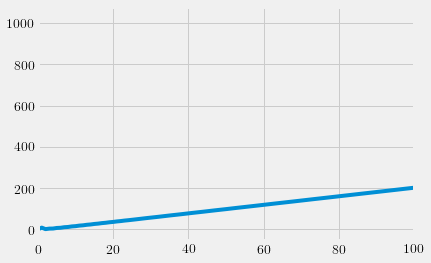

In [19]:
plt.plot(ns, fish_nl)
plt.xlim([0, 100])

# Mutual Info, Linear Stage

In [18]:
ns1 = np.arange(500)
ns2 = np.arange(2, 500, 2)
ns3 = np.arange(3, 500, 3)
ns4 = np.arange(4, 500, 4)

muts1 = np.zeros(ns1.shape)
muts2 = np.zeros(ns2.shape)
muts3 = np.zeros(ns3.shape)
muts4 = np.zeros(ns4.shape)

fish1 = np.zeros(ns1.shape)
fish2 = np.zeros(ns2.shape)
fish3 = np.zeros(ns3.shape)
fish4 = np.zeros(ns4.shape)

fish_nl_1 = np.zeros(ns1.shape)
fish_nl_2 = np.zeros(ns2.shape)
fish_nl_3 = np.zeros(ns3.shape)
fish_nl_4 = np.zeros(ns4.shape)

In [23]:
for idx, n in enumerate(ns1):
    lnn = LNN(v = np.ones(n), w = np.ones(n))
    muts1[idx] = lnn.MI_linear_stage()
    fish1[idx] = lnn.FI_linear_stage()
    fish_nl_1[idx] = lnn.FI_squared_nonlin(2)
    
for idx, n in enumerate(ns2):
    v = np.ones(n)
    w = LNN.struct_weight_maker(n, 2)
    lnn = LNN(v = v, w = w)
    muts2[idx] = lnn.MI_linear_stage()
    fish2[idx] = lnn.FI_linear_stage()
    fish_nl_2[idx] = lnn.FI_squared_nonlin(2)

for idx, n in enumerate(ns3):
    v = np.ones(n)
    w = LNN.struct_weight_maker(n, 3)
    lnn = LNN(v = v, w = w)
    muts3[idx] = lnn.MI_linear_stage()
    fish3[idx] = lnn.FI_linear_stage()
    fish_nl_3[idx] = lnn.FI_squared_nonlin(2)

for idx, n in enumerate(ns4):
    v = np.ones(n)
    w = LNN.struct_weight_maker(n, 4)
    lnn = LNN(v = v, w = w)
    muts4[idx] = lnn.MI_linear_stage()
    fish4[idx] = lnn.FI_linear_stage()
    fish_nl_4[idx] = lnn.FI_squared_nonlin(2)

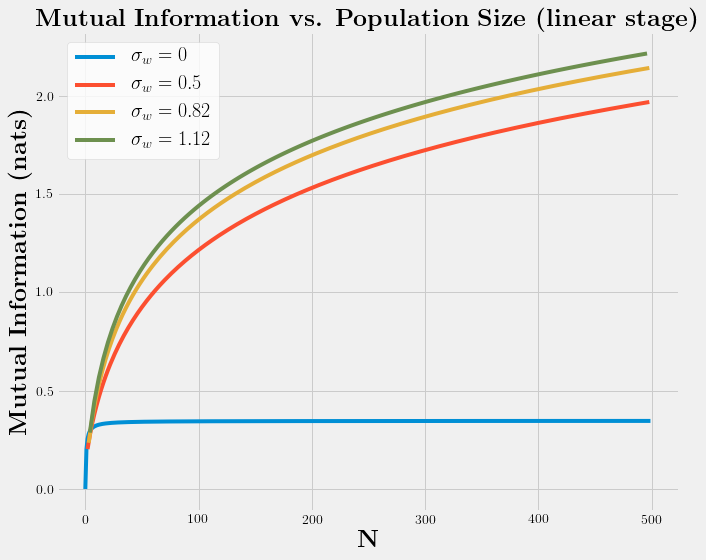

In [74]:
plt.figure(figsize = (10,8))
#plt.plot(ns0, fish_nl_0, label = 'zero')
plt.plot(ns1, muts1, label = r'$\sigma_w = 0$')
plt.plot(ns2, muts2, label = r'$\sigma_w = 0.5$')
plt.plot(ns3, muts3, label = r'$\sigma_w = 0.82$')
plt.plot(ns4, muts4, label = r'$\sigma_w = 1.12$')
#plt.plot(nsN, fish_nl_N, label = r'$N$s')
lgd = plt.legend(loc = 2, prop = {'size' : 20})
lgd.get_frame().set_facecolor('white')
plt.title(r'\textbf{Mutual Information vs. Population Size (linear stage)}', fontsize = 25)
plt.xlabel(r'$\mathbf{N}$', fontsize = 25)
plt.ylabel(r'\textbf{Mutual Information (nats)}', fontsize = 25)
plt.tight_layout()
plt.savefig('mutual_linear_stage.pdf')

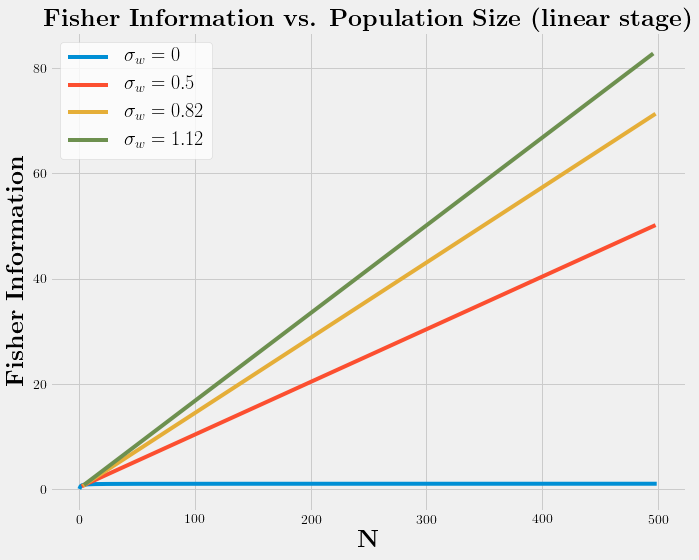

In [75]:
plt.figure(figsize = (10,8))
#plt.plot(ns0, fish_nl_0, label = 'zero')
plt.plot(ns1, fish1, label = r'$\sigma_w = 0$')
plt.plot(ns2, fish2, label = r'$\sigma_w = 0.5$')
plt.plot(ns3, fish3, label = r'$\sigma_w = 0.82$')
plt.plot(ns4, fish4, label = r'$\sigma_w = 1.12$')
lgd = plt.legend(loc = 2, prop = {'size' : 20})
lgd.get_frame().set_facecolor('white')
plt.title(r'\textbf{Fisher Information vs. Population Size (linear stage)}', fontsize = 25)
plt.xlabel(r'$\mathbf{N}$', fontsize = 25)
plt.ylabel(r'\textbf{Fisher Information}', fontsize = 25)
plt.tight_layout()
plt.savefig('fisher_linear_stage.pdf')

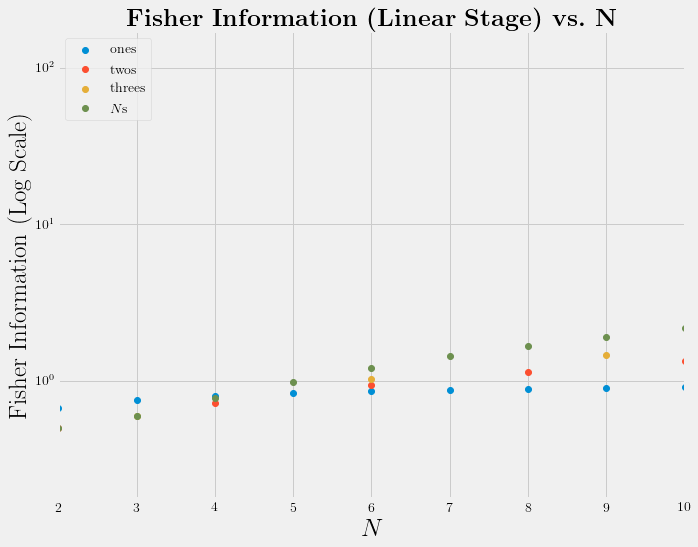

In [42]:
plt.figure(figsize = (10,8))
#plt.plot(ns0, fish0, label = 'zero')
plt.scatter(ns1, fish1, label = 'ones', linewidth = 1)
plt.scatter(ns2, fish2, label = 'twos', linewidth = 1)
plt.scatter(ns3, fish3, label = 'threes', linewidth = 1)
plt.scatter(nsN, fishN, label = r'$N$s', linewidth = 1)
plt.legend(loc = 2)
plt.title(r'\textbf{Fisher Information vs. Population Size', fontsize = 25)
plt.xlabel(r'$N$', fontsize = 25)
plt.ylabel('Fisher Information (Log Scale)', fontsize = 25)
plt.xlim([2,10])
plt.yscale('log')
#plt.savefig('fisher_linear_stage.pdf')

# Unstructured Weights

In [32]:
N = 250
scales = np.arange(1., 10, 0.5)
repetitions = 1000
v = np.ones(N)
fishers = np.zeros((len(scales), repetitions))
fisher_non = np.zeros((len(scales), repetitions))
muts = np.zeros(fishers.shape)
for scale_idx, scale in enumerate(scales):
    for rep in range(repetitions):
        w = 1 + LNN.unstruct_weight_maker(N, 'lognormal', loc = 0, scale = scale)
        lnn = LNN(v = v, w = w)
        FI_linear = lnn.FI_linear_stage()
        MI_linear = lnn.MI_linear_stage()
        fishers[scale_idx, rep] = FI_linear
        muts[scale_idx, rep] = MI_linear
        fisher_non[scale_idx, rep] = lnn.FI_squared_nonlin(2)

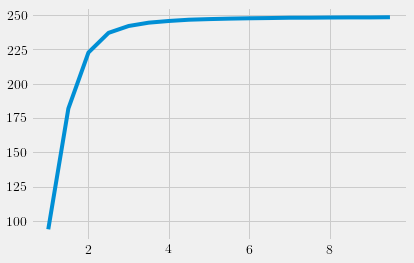

In [33]:
plt.plot(scales, np.mean(fishers, axis = 1))

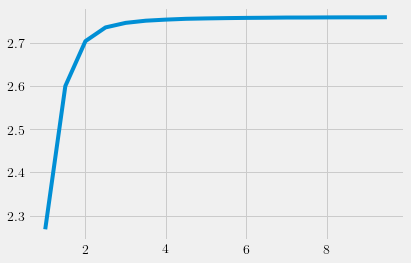

In [34]:
plt.plot(scales, np.mean(muts, axis = 1))

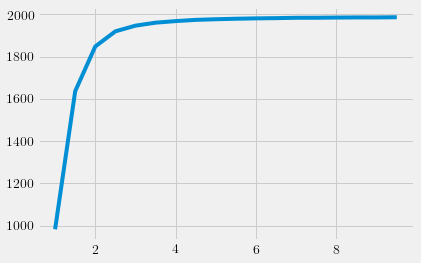

In [35]:
plt.plot(scales, np.mean(fisher_non, axis = 1))

In [29]:
np.std(LNN.struct_weight_maker(15, 3))

0.81649658092772603

In [65]:
N = 250
ks = np.arange(1,11)
stds = np.array([np.std(LNN.struct_weight_maker(N, k)) for k in ks])
fisher_sqs50 = np.zeros(ks.size)
fisher_sqs100 = np.zeros(ks.size)
fisher_sqs250 = np.zeros(ks.size)
fisher_sqs500 = np.zeros(ks.size)

In [67]:
for idx, k in enumerate(ks):
    lnn = LNN(v = LNN.struct_weight_maker(50, 1), w = LNN.struct_weight_maker(50, k))
    fisher_sqs50[idx] = lnn.FI_squared_nonlin(2.)
    lnn = LNN(v = LNN.struct_weight_maker(100, 1), w = LNN.struct_weight_maker(100, k))
    fisher_sqs100[idx] = lnn.FI_squared_nonlin(2.)
    lnn = LNN(v = LNN.struct_weight_maker(250, 1), w = LNN.struct_weight_maker(250, k))
    fisher_sqs250[idx] = lnn.FI_squared_nonlin(2.)
    lnn = LNN(v = LNN.struct_weight_maker(500, 1), w = LNN.struct_weight_maker(500, k))
    fisher_sqs500[idx] = lnn.FI_squared_nonlin(2.)

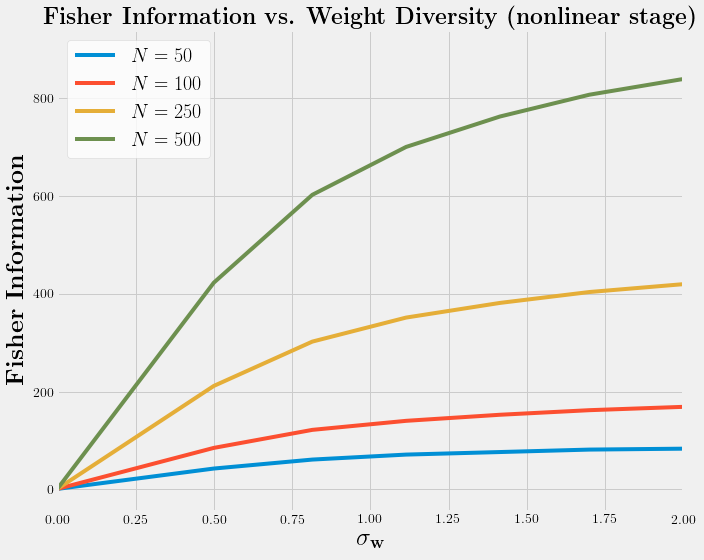

In [83]:
plt.figure(figsize = (10,8))
plt.plot(stds, fisher_sqs50, label = r'$N=50$')
plt.plot(stds, fisher_sqs100, label = r'$N=100$')
plt.plot(stds, fisher_sqs250, label = r'$N=250$')
plt.plot(stds, fisher_sqs500, label = r'$N = 500$')
plt.title(r'\textbf{Fisher Information vs. Weight Diversity (nonlinear stage)', fontsize = 23)
plt.xlabel(r'$\mathbf{\sigma_w}$', fontsize = 25)
plt.ylabel(r'\textbf{Fisher Information}', fontsize = 25)
lgd = plt.legend(loc = 2, prop = {'size' : 20})
lgd.get_frame().set_facecolor('white')
plt.xlim([0, 2.])
plt.tight_layout()
plt.savefig('fisher_squared.pdf')

In [64]:
stds

[0.0,
 0.5,
 0.81482268009671899,
 1.1143859295594143,
 1.4142135623730951,
 1.6998823488700621,
 1.9898301435047163,
 2.2527636360701493,
 2.5672896213711454,
 2.8722813232690143]